In [1]:
# Random array function
import numpy as np
import matplotlib.pyplot as plt

def get_random_arrays():
    rng = np.random.default_rng(42)
    random_arrays = [rng.integers(low=-10000, high=10000, size=10**i) for i in range(1, 4)]
    for arr in random_arrays:
        print(arr.shape)

    return random_arrays

# Test list
data = [5,7,3,9,4,2,1,8,6]

In [2]:
def partition(arr, low, high):
    # Choose the pivot (last element in the current partition)
    pivot = arr[high]

    # Initialize the pointer for the smaller element
    i = low

    # Iterate through the partitioned array, starting at low
    for j in range(low, high):
        # If the current element is smaller than or equal to the pivot, swap it with the pointer
        if arr[j] <= pivot:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1

    # Place the pivot in its correct position by swapping it with the element next to the smaller element
    arr[i], arr[high] = arr[high], arr[i]

    # Return the index of the pivot
    return i

In [3]:
# Test partitioning (pivot at position 2)
test_pivot = [1, 4, 5, 2, 3]
partition(test_pivot, 0, len(test_pivot) - 1)

2

In [4]:
# In place quick sorting
def in_place_quick_sort(arr, low, high):
    if low < high:
        # Partition the array and get the index of the pivot
        pivot_index = partition(arr, low, high)

        # Recursively call quick_sort on the less partition
        in_place_quick_sort(arr, low, pivot_index - 1)
        
        # Recursively call quick_sort on the greater partition
        in_place_quick_sort(arr, pivot_index + 1, high)


In [5]:
in_place_quick_sort(data, 0, len(data) - 1)
print(data)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [6]:
# Time in place sorting
import timeit

data = [5,7,3,9,4,2,1,8,6]
timeit.timeit(lambda: in_place_quick_sort(data, 0 , len(data) - 1), number=100)

0.0002958999975817278

In [7]:
# Quick sort with list comprehension
def list_comp_quick_sort(arr):
    if len(arr) <= 1:
        return arr

    # Choose the pivot element (in this case, the last element of the array)
    pivot = arr[-1]

    # Divide the remaining elements into two lists: less and greater
    less = [x for x in arr[:-1] if x <= pivot]
    greater = [x for x in arr[:-1] if x > pivot]

    # Recursively call quick_sort on the less and greater lists
    sorted_less = list_comp_quick_sort(less)
    sorted_greater = list_comp_quick_sort(greater)

    # Combine the sorted less, pivot, and sorted greater lists
    sorted_array = sorted_less + [pivot] + sorted_greater

    # Print the current state of the array at each step
    # print(f"Sorted: {sorted_less} [{pivot}] {sorted_greater}")

    # Return the sorted array
    return sorted_array

In [8]:
# sort some data
data = [5,7,3,9,4,2,1,8,6]
list_comp_quick_sort(data)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [9]:
# Make random arrays
random_arrays = get_random_arrays()

(10,)
(100,)
(1000,)


In [10]:
# Time comparisons (with built-in sorted). Sometimes in place hits recursion limit, so only run first two arrays
from timeit import timeit

list_comp_times = [timeit(lambda: list_comp_quick_sort(arr), number=100) / 100 for arr in random_arrays]
in_place_times = [timeit(lambda: in_place_quick_sort(arr, 0, len(arr) - 1), number=100) / 100 for arr in random_arrays]
sorted_times = [timeit(lambda: sorted(arr), number=100) / 100 for arr in random_arrays]

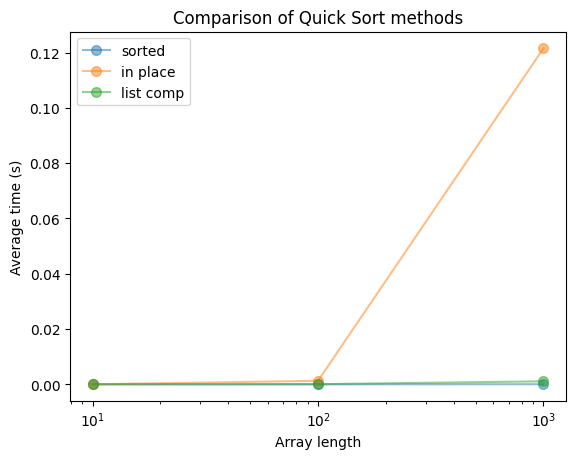

In [11]:
# Plot results
import matplotlib.pyplot as plt

x = [len(arr) for arr in random_arrays]

fig, ax = plt.subplots(1)
ax.plot(x, sorted_times, marker="o", markersize=7, alpha=0.5, label="sorted")
ax.plot(x, in_place_times, marker="o", markersize=7, alpha=0.5, label="in place")
ax.plot(x, list_comp_times, marker="o", markersize=7, alpha=0.5, label="list comp")
ax.set_xscale("log")
ax.set_title("Comparison of Quick Sort methods")
ax.set_xlabel("Array length")
ax.set_ylabel("Average time (s)")
ax.legend()
plt.show()
